In [1]:
# Initialzing all tools that I may need
import pathlib as Path
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Setting up the paths to the CSVs
algo_data= ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/algo_returns.csv')
whale_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/whale_returns.csv')
sp500_data = ('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/sp500_history.csv')

In [3]:
# Creating dataframes 
algo_df = pd.read_csv(algo_data,index_col='Date',infer_datetime_format=True,parse_dates=True)
whale_df = pd.read_csv(whale_data,index_col='Date',infer_datetime_format=True,parse_dates=True)
sp500_df = pd.read_csv(sp500_data,index_col='Date',infer_datetime_format=True,parse_dates=True)

#Sorting the dates in all dataframes
sp500_df.sort_index(ascending=True,inplace=True)
algo_df.sort_index(ascending=True,inplace=True)
whale_df.sort_index(ascending=True,inplace=True)


In [4]:
# sampling dataframes
algo_df.head(7)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285


In [5]:
whale_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2018-06-01,0.005212,0.003764,0.005158,0.013490
2015-09-28,-0.030526,-0.030282,-0.026430,-0.030485
2018-06-08,0.001795,0.007805,0.010083,0.008575
2016-09-06,0.004743,0.007226,0.001720,0.013466
2017-02-09,0.004703,0.002544,0.006673,0.012526


In [6]:
sp500_df.tail()

,Close
Date,
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97
2019-04-23,$2933.68


In [7]:
# veiwing if there is any null values
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [8]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [10]:
# dropping null values
algo_df.dropna(inplace=True)
whale_df.dropna(inplace=True)

In [11]:
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-06-05,False,False
2014-06-06,False,False
2014-06-09,False,False
2014-06-10,False,False
2014-06-11,False,False
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [12]:
whale_df.isnull().mean()/len(whale_df)*100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

In [13]:
# Converting $ currency format to float
sp500_df['Close']=sp500_df['Close'].str.replace("$","")
sp500_df['Close']=sp500_df['Close'].astype("float")
sp500_df.dtypes

<ipython-input-13-592832e8d6ff>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close']=sp500_df['Close'].str.replace("$","")


Close    float64
dtype: object

In [14]:
#Converting closing price to daily returns
sp500_df_returns=sp500_df.pct_change().dropna()

In [15]:
# changed the name of the S&P 500 returns dataframe to compare to the other dataf
sp500_df_returns=sp500_df_returns.rename(columns={'Close':'S&P 500'})
sp500_df_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
#combining all dataframes
combined_df=pd.concat([algo_df,whale_df,sp500_df_returns],axis='columns',join='inner')
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


In [17]:
combined_df.columns

Index(['Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'S&P 500'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

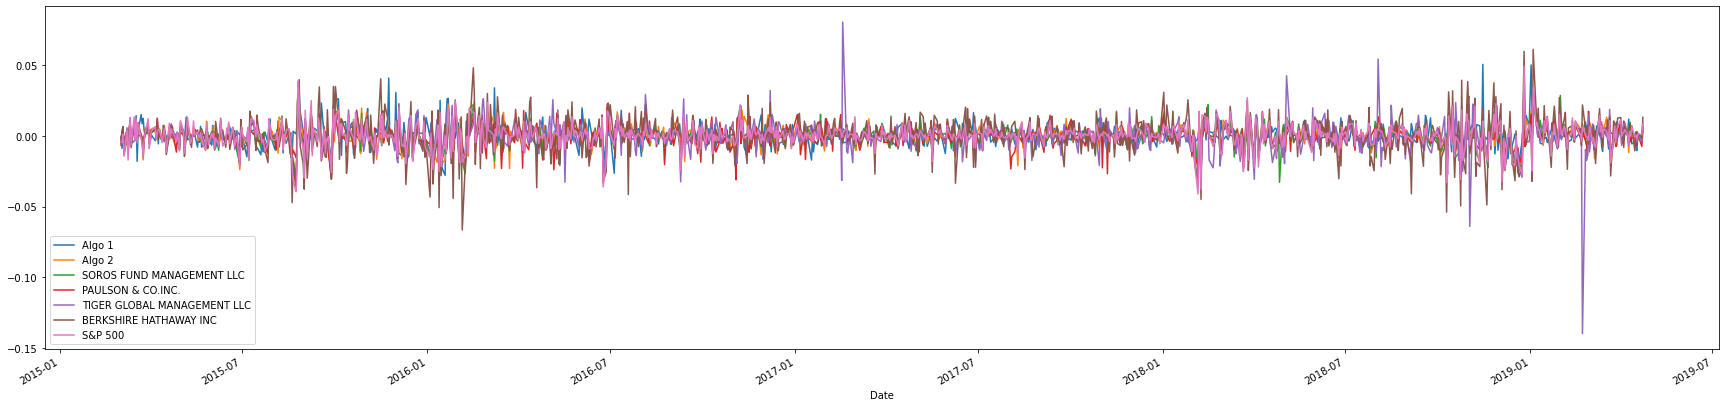

In [18]:
# PERFORMANCE ANALYSIS 
## I will combine one plot with all portfolios and plot each individual portfolio to the S&P 500 for a better view
combined_df.plot(figsize=(30,7))

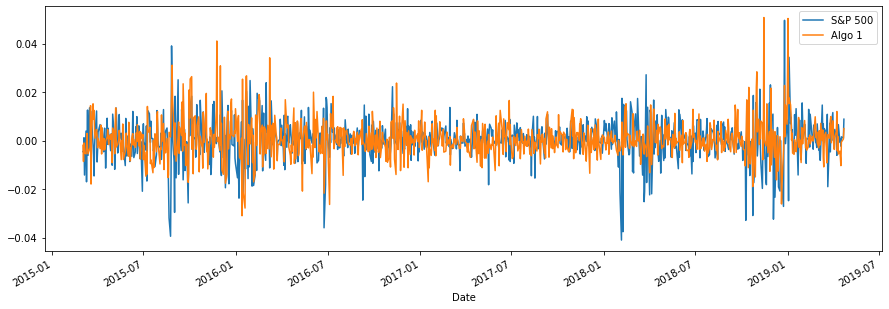

In [19]:
ax=combined_df['S&P 500'].plot()
combined_df['Algo 1'].plot(ax=ax,figsize=(15,5))
ax.legend(['S&P 500','Algo 1'])

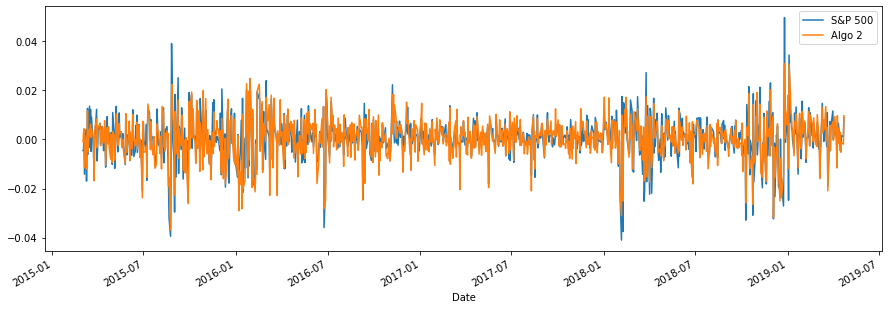

In [20]:
ax=combined_df['S&P 500'].plot()
combined_df['Algo 2'].plot(ax=ax,figsize=(15,5))
ax.legend(['S&P 500','Algo 2'])

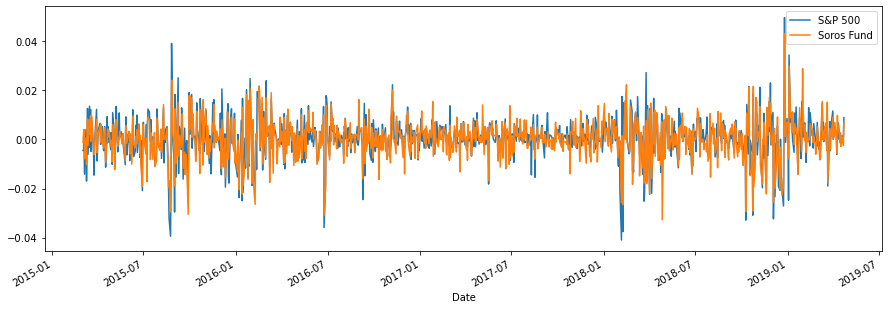

In [21]:
ax=combined_df['S&P 500'].plot()
combined_df['SOROS FUND MANAGEMENT LLC'].plot(ax=ax,figsize=(15,5))
ax.legend(['S&P 500','Soros Fund'])

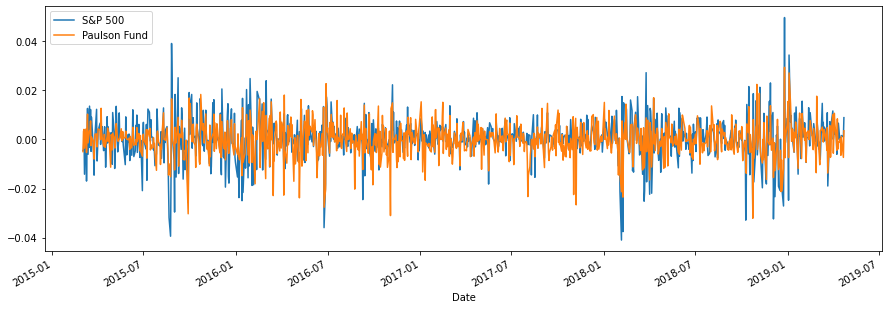

In [22]:
ax=combined_df['S&P 500'].plot()
combined_df['PAULSON & CO.INC. '].plot(ax=ax,figsize=(15,5))
ax.legend(['S&P 500','Paulson Fund'])

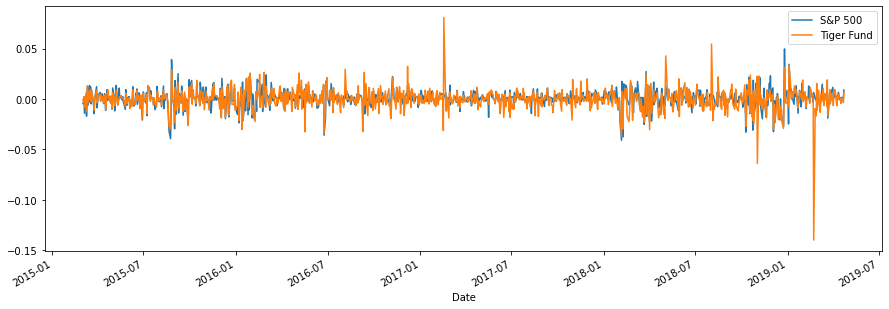

In [23]:
ax=combined_df['S&P 500'].plot()
combined_df['TIGER GLOBAL MANAGEMENT LLC'].plot(ax=ax,figsize=(15,5))
ax.legend(['S&P 500','Tiger Fund'])

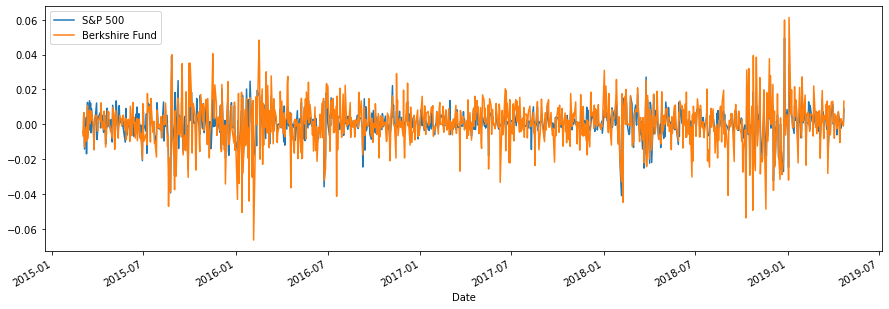

In [24]:
ax=combined_df['S&P 500'].plot()
combined_df['BERKSHIRE HATHAWAY INC'].plot(ax=ax,figsize=(15,5))
ax.legend(['S&P 500','Berkshire Fund'])

In [25]:
## number statistics to compare portfolios to the S&P 500
combined_df.describe(include='all')

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000662,0.000263,0.000177,-0.000214,-0.000083,0.000506,0.000349
std,0.007620,0.008342,0.007895,0.007023,0.010894,0.012919,0.008554
min,-0.030951,-0.036937,-0.032711,-0.032099,-0.139820,-0.066505,-0.040979
25%,-0.003252,-0.003794,-0.003638,-0.004042,-0.004790,-0.005634,-0.002881
50%,0.000069,0.000703,0.000518,0.000000,0.000320,0.000735,0.000419
75%,0.003908,0.005253,0.004328,0.003626,0.005285,0.007619,0.004471
max,0.050735,0.030822,0.042977,0.029338,0.080705,0.061341,0.049594


In [26]:
## calculating cummulative returns for all portfolios
cumm_returns = (1 + combined_df).cumprod()
cumm_returns.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431,0.995461
2015-03-04,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617,0.991093
2015-03-05,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327,0.992278
2015-03-06,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172,0.978214
2015-03-09,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534,0.982072


In [27]:
## numerical data to compare the cummulative returns to the S&P 500
cumm_returns.describe()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,1.388985,1.086949,1.049830,0.876039,1.147966,1.159619,1.123552
std,0.232277,0.131700,0.073238,0.088455,0.149844,0.241575,0.144448
min,0.911863,0.788600,0.881701,0.691364,0.822799,0.776232,0.863837
25%,1.333701,0.983461,0.989084,0.792596,1.016652,0.936031,0.990805
50%,1.411527,1.084230,1.040700,0.864336,1.139221,1.057741,1.115912
75%,1.469018,1.201804,1.118691,0.950079,1.285354,1.358942,1.263211
max,1.982997,1.318465,1.204573,1.050682,1.428464,1.638119,1.385517


<AxesSubplot:xlabel='Date'>

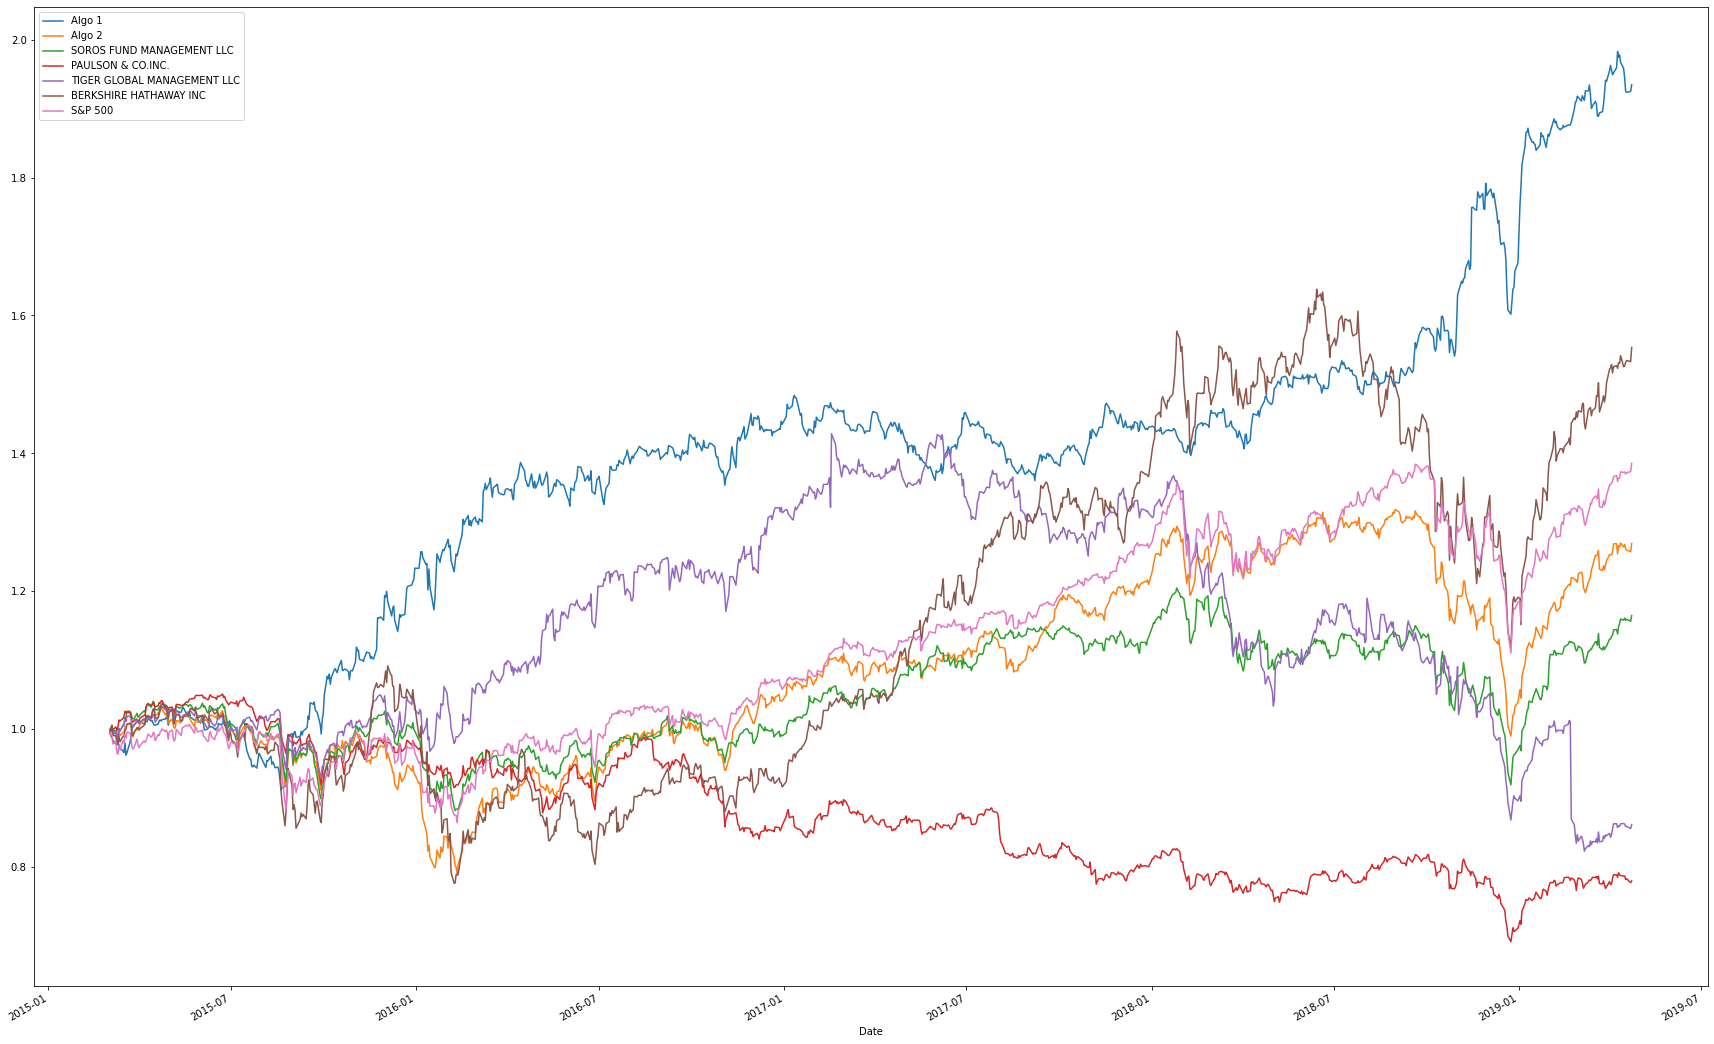

In [28]:
cumm_returns.plot(figsize=(30,20))

In [29]:
# ANSWER
# Based on individual plots and summary statistics 'Algo 1' beats out the S&P 500.The 'Algo 1'portfolio beats the S&P 500 with a higher minimum return, higher average, higher mean and
# higher max. Looking at the daily return plot graphs you can see also basic resistance and support levels favoring the 'Algo 1' portfolio. Then followed by Berkshire and S&P 500 
# coming in third. Algo 2 came just behind the S&P 500.

<AxesSubplot:>

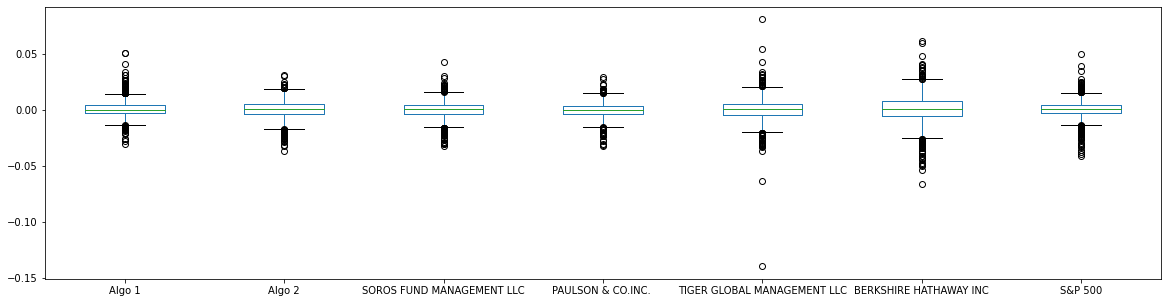

In [30]:
# RISK ANALYSIS
## Plot box to visually show risk
combined_df.plot.box(figsize=(20,5))

In [31]:
## Calculating the standard deviation of all portfolios
returns_std=combined_df.std()
returns_std.sort_values(ascending=False,inplace=True)
returns_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [32]:
# ANSWER
# Based on the plot box and standard deviation figures Tiger Global Management LLC, & Berkshire Hathaway Inc is riskier than the S&P 500.

In [33]:
## Calculating the annualized standard deviation
annual_returns_std = returns_std * np.sqrt(252)
annual_returns_std.sort_values(ascending=False,inplace=True)

In [34]:
annual_returns_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

<AxesSubplot:xlabel='Date'>

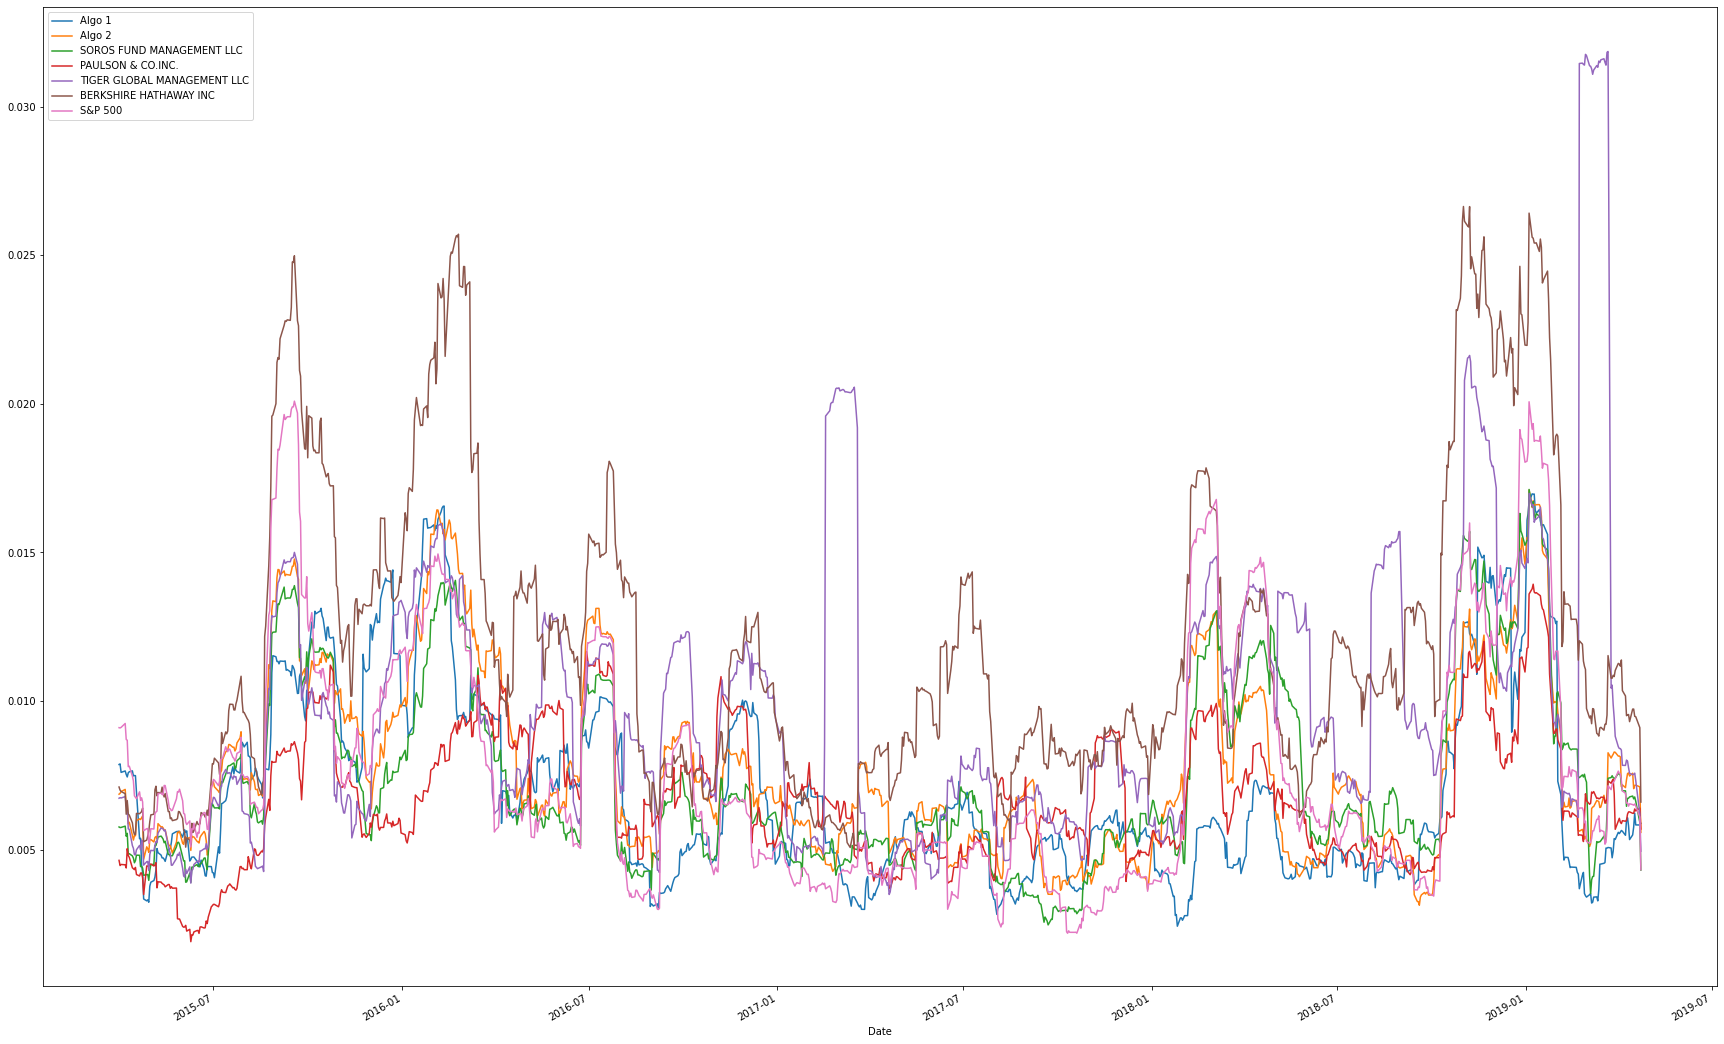

In [35]:
#ROLLING STATISTICS
## Calculate and plot the rolling standard devation for all portfolios using a 21 day window
rolling_std_21=combined_df.rolling(window=21).std().plot(figsize=(30,20))
rolling_std_21

In [36]:
# get the correlation of the portfolios and S&P 500
correlation = combined_df.corr()
correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
S&P 500,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


In [37]:
# 'Algo 2' is the closest to mimick the S&P 500 followed by the Soros Fund portfolio. 

<AxesSubplot:xlabel='Date'>

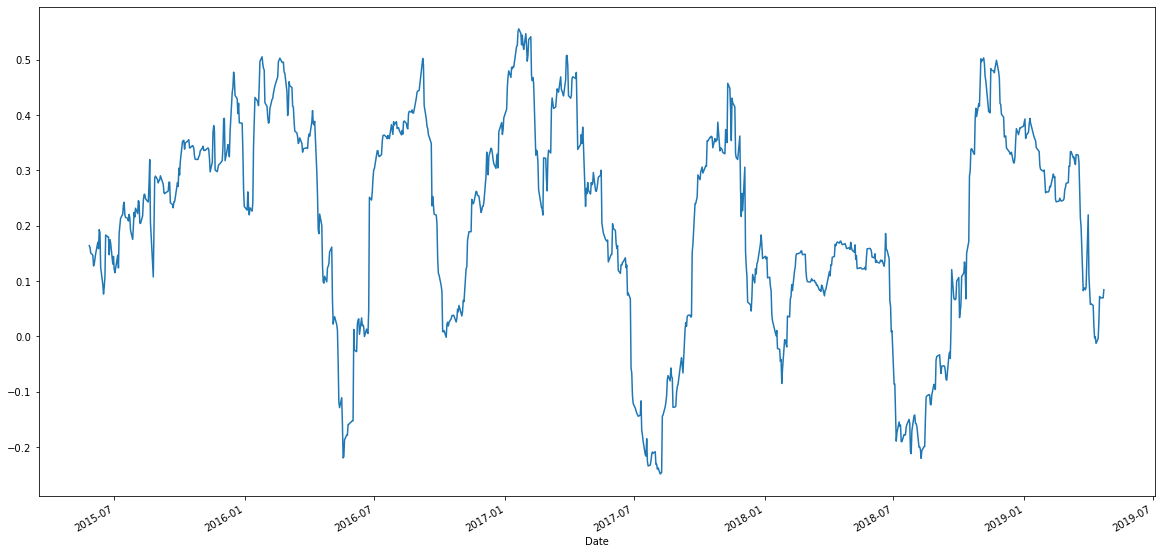

In [38]:
# Choose one portfolio, then calculate and plot the 60 day rolling beta between it and the S&P 500
algo1_rolling_cov=combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_var=combined_df['S&P 500'].rolling(window=60).var()
rolling_beta=algo1_rolling_cov/rolling_var
rolling_beta.plot(figsize=(20,10))

In [39]:
## Trying to use the ewm function 
ewm_21 = combined_df.ewm(halflife=21).mean()
ewm_21

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.005320,0.000761,0.000511,-0.000802,-0.001532,-0.001089,-0.004462
2015-03-05,-0.003817,0.001988,0.001718,0.000878,-0.000193,0.001603,-0.002514
2015-03-06,-0.004116,-0.001542,-0.000808,-0.000291,-0.002369,-0.002256,-0.005575
2015-03-09,-0.004400,-0.000935,-0.000511,0.000673,-0.000616,-0.002128,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.000912,0.001364,0.001480,0.000448,-0.000813,0.001862,0.001352
2019-04-17,0.000548,0.001150,0.001338,0.000223,-0.000930,0.001906,0.001234
2019-04-18,0.000511,0.001073,0.001341,0.000256,-0.000881,0.001907,0.001246


<AxesSubplot:xlabel='Date'>

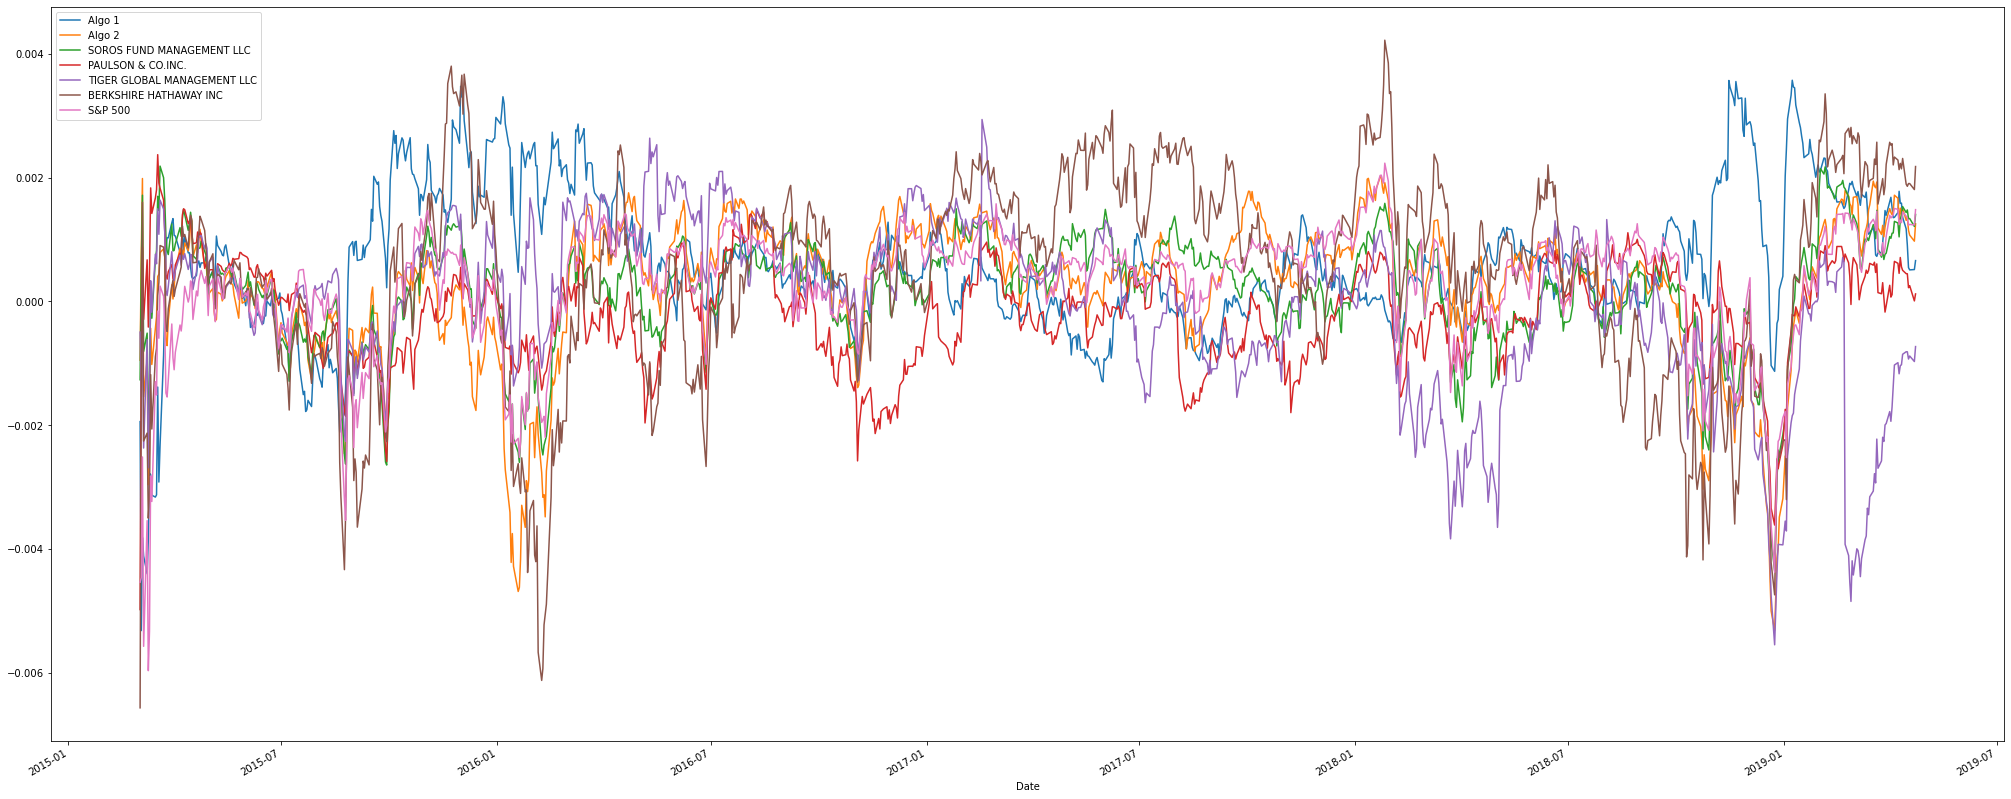

In [40]:
## plot the exponentially weighted average
ewm_21.plot(figsize=(35,15))

In [41]:
# SHARPE RATIOS
## Sharpe Ratio of all portfolios
sharpe_ratio=combined_df.mean() *252 /(combined_df.std() * np.sqrt(252))
sharpe_ratio.sort_values(ascending=False,inplace=True)
sharpe_ratio

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

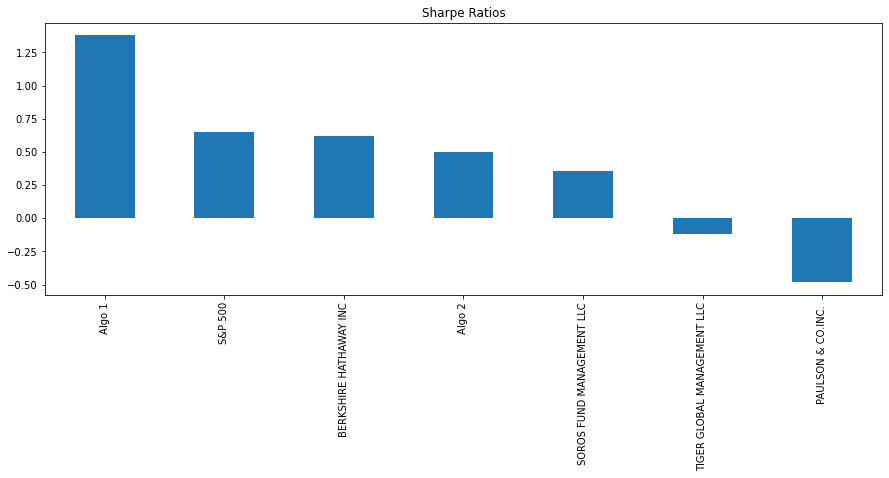

In [42]:
## Bar plot the sharpe ratios
sharpe_ratio.plot.bar(title="Sharpe Ratios",figsize=(15,5))

In [43]:
# ANSWER
# Algo 1 does out perform the S&P 500 and the whale investors portfolios. Algo 2 beats out the majority of the whal investor portfolio except Berkshire and it does not beat the 
# S&P 500.

In [44]:
# CUSTOM PORTFOLIO
## Setting up the different investments in my custom portfolio
goog=('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/GOOG.csv')
hd=('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/HD.csv')
dis=('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/DIS.csv')
cost=('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/COST.csv')
aapl=('C:/Users/Siegfried Vieluf/Desktop/Finance BootCamp/Python_Pandas/pandas-homework/Resources/AAPL.csv')

goog_df=pd.read_csv(goog,index_col='Date',infer_datetime_format=True,parse_dates=True)
goog_df.sort_index(ascending=True,inplace=True)

hd_df=pd.read_csv(hd,index_col='Date',infer_datetime_format=True,parse_dates=True)
hd_df.sort_index(ascending=True,inplace=True)

dis_df=pd.read_csv(dis,index_col='Date',infer_datetime_format=True,parse_dates=True)
dis_df.sort_index(ascending=True,inplace=True)

cost_df=pd.read_csv(cost,index_col='Date',infer_datetime_format=True,parse_dates=True)
cost_df.sort_index(ascending=True,inplace=True)

aapl_df=pd.read_csv(aapl,index_col='Date',infer_datetime_format=True,parse_dates=True)
aapl_df.sort_index(ascending=True,inplace=True)

cost_df.head()

,Close
Date,
2015-03-02,147.94
2015-03-03,147.37
2015-03-04,147.17
2015-03-05,151.17
2015-03-06,149.54


In [45]:
hd_df.head()

,Close
Date,
2015-03-02,116.12
2015-03-03,116.07
2015-03-04,114.76
2015-03-05,115.91
2015-03-06,114.45


In [46]:
## Combining the raw data of close prices
my_portfolio=pd.concat([goog_df,hd_df,dis_df,cost_df,aapl_df],axis='columns',join='inner')
my_portfolio.head()

,Close,Close,Close,Close,Close
Date,,,,,
2015-03-02,569.78,116.12,105.89,147.94,32.27
2015-03-03,572.07,116.07,106.35,147.37,32.34
2015-03-04,571.80,114.76,105.57,147.17,32.14
2015-03-05,573.76,115.91,105.03,151.17,31.60
2015-03-06,566.13,114.45,103.82,149.54,31.65


In [47]:
my_portfolio.tail()

,Close,Close,Close,Close,Close
Date,,,,,
2019-04-16,1227.13,204.47,129.90,245.34,49.81
2019-04-17,1236.34,206.55,131.75,245.56,50.78
2019-04-18,1236.37,205.66,132.45,245.81,50.97
2019-04-22,1248.84,204.78,131.68,243.42,51.13
2019-04-23,1264.55,206.05,133.36,245.58,51.87


In [48]:
## Change columns to TICKERS
columns=['GOOG','HD','DIS','COST','AAPL']
my_portfolio.columns=columns
my_portfolio.head()

,GOOG,HD,DIS,COST,AAPL
Date,,,,,
2015-03-02,569.78,116.12,105.89,147.94,32.27
2015-03-03,572.07,116.07,106.35,147.37,32.34
2015-03-04,571.80,114.76,105.57,147.17,32.14
2015-03-05,573.76,115.91,105.03,151.17,31.60
2015-03-06,566.13,114.45,103.82,149.54,31.65


In [49]:
## Convwet closing prices to daily returns
my_portfolio_returns=my_portfolio.pct_change().dropna()
my_portfolio_returns.head()

,GOOG,HD,DIS,COST,AAPL
Date,,,,,
2015-03-03,0.004019,-0.000431,0.004344,-0.003853,0.002169
2015-03-04,-0.000472,-0.011286,-0.007334,-0.001357,-0.006184
2015-03-05,0.003428,0.010021,-0.005115,0.027179,-0.016801
2015-03-06,-0.013298,-0.012596,-0.011521,-0.010783,0.001582
2015-03-09,0.002049,0.006990,0.013870,0.007623,0.004423


In [50]:
## Getting the equally weighted returns of my portfolio
weights=[0.2,0.2,0.2,0.2,0.2]
weighted_returns=my_portfolio_returns.dot(weights)
weighted_returns.head()

Date
2015-03-03    0.001250
2015-03-04   -0.005327
2015-03-05    0.003742
2015-03-06   -0.009323
2015-03-09    0.006991
dtype: float64

In [51]:
## Adding my portfolio to the combined portfolio
combined_df['Ziggy']=weighted_returns
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Ziggy
Date,,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,0.001250
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.005327
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196,0.003742
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.009323
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944,0.006991


In [52]:
combined_df.describe()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Ziggy
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000662,0.000263,0.000177,-0.000214,-0.000083,0.000506,0.000349,0.000585
std,0.007620,0.008342,0.007895,0.007023,0.010894,0.012919,0.008554,0.009736
min,-0.030951,-0.036937,-0.032711,-0.032099,-0.139820,-0.066505,-0.040979,-0.042290
25%,-0.003252,-0.003794,-0.003638,-0.004042,-0.004790,-0.005634,-0.002881,-0.003840
50%,0.000069,0.000703,0.000518,0.000000,0.000320,0.000735,0.000419,0.000964
75%,0.003908,0.005253,0.004328,0.003626,0.005285,0.007619,0.004471,0.005679
max,0.050735,0.030822,0.042977,0.029338,0.080705,0.061341,0.049594,0.059853


In [53]:
## Annualized Standard Deviation of all portfolios including my own
portfolio_std=combined_df.std() * np.sqrt(252)
portfolio_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
Ziggy                          0.154551
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

In [54]:
## Calculate & Plot rolling std with a 21 day window
portfolio_std_21=combined_df.rolling(window=21).std()
portfolio_std_21

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Ziggy
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.005760,0.007053,0.006711,0.006224,0.007532,0.009731,0.006498,0.008471
2019-04-17,0.006229,0.007165,0.006773,0.006370,0.007574,0.009485,0.006537,0.008424
2019-04-18,0.005834,0.007172,0.006633,0.006303,0.007328,0.009475,0.006470,0.008409


<AxesSubplot:xlabel='Date'>

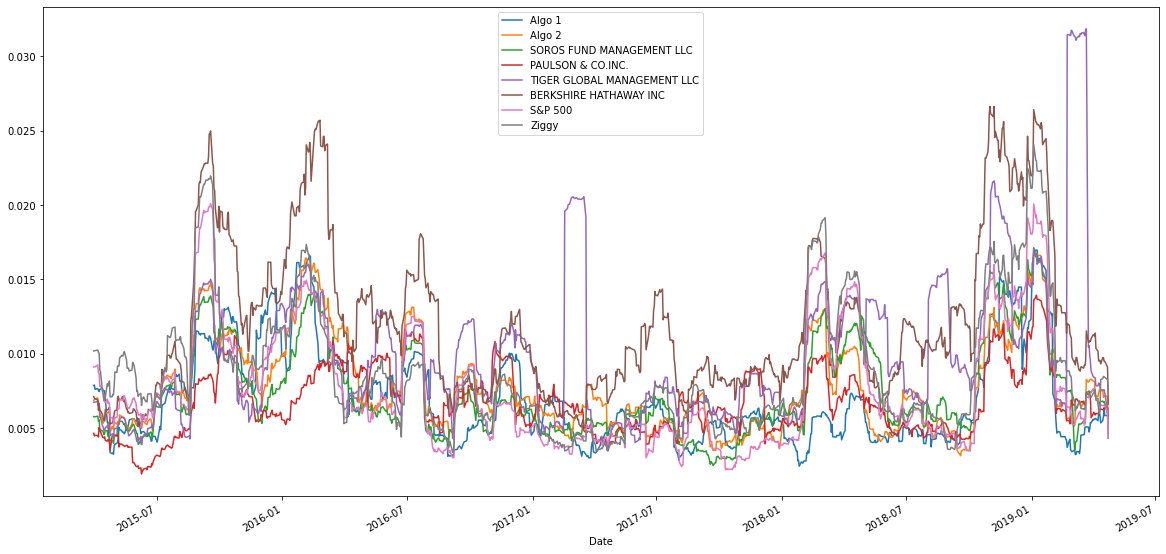

In [55]:
portfolio_std_21.plot(figsize=(20,10))

In [56]:
# Calculate & Plot the Correlation 
portfolio_corr=combined_df.corr()
portfolio_corr

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Ziggy
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494,0.225524
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764,0.703516
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864,0.712790
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732,0.558423
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946,0.568628
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371,0.697856
S&P 500,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000,0.873119
Ziggy,0.225524,0.703516,0.712790,0.558423,0.568628,0.697856,0.873119,1.000000


<AxesSubplot:>

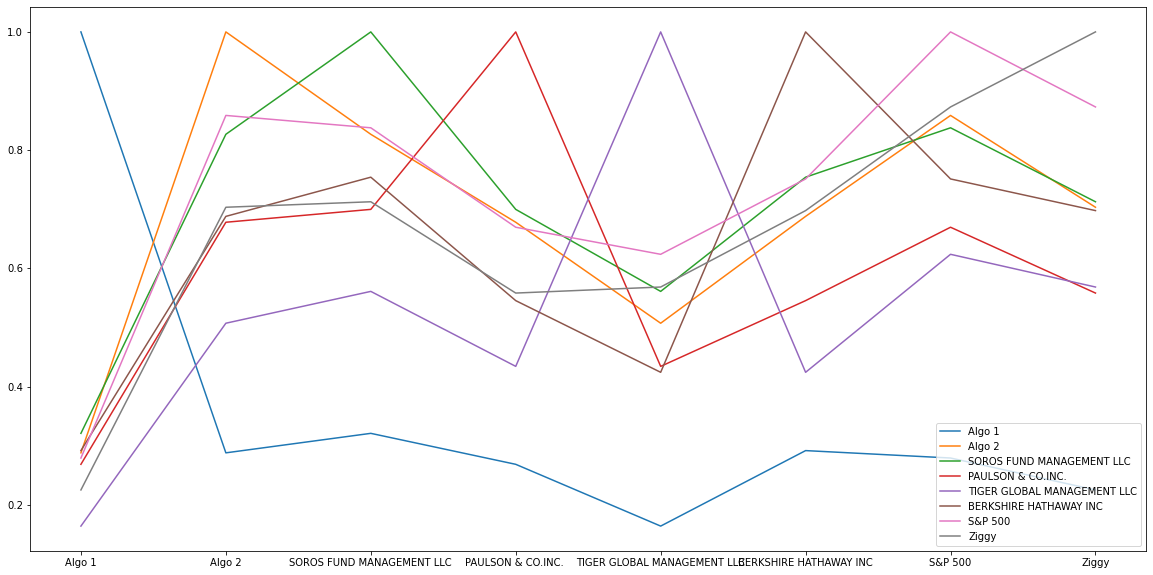

In [57]:
portfolio_corr.plot(figsize=(20,10))

<AxesSubplot:>

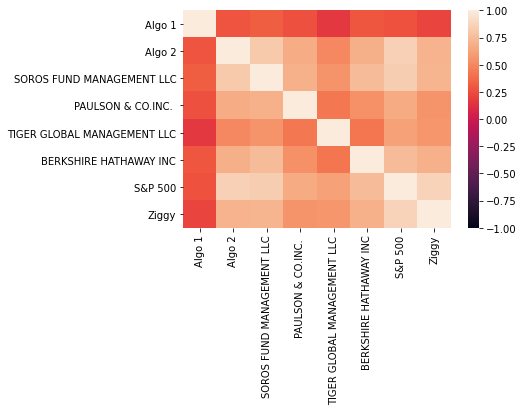

In [58]:
## Plot a heatmap
sns.heatmap(portfolio_corr,vmin=-1,vmax=1)

In [59]:
## Calculate & Plot rolling beta of my portfolio with the S&P 500 in a 60 day period
my_port_covar=combined_df['Ziggy'].cov(combined_df['S&P 500'])
my_port_covar

7.271108301992988e-05

In [60]:
variance=combined_df['S&P 500'].var()
variance

7.316632424648712e-05

In [61]:
ziggy_beta=my_port_covar/variance
ziggy_beta

0.9937779951193996

<AxesSubplot:xlabel='Date'>

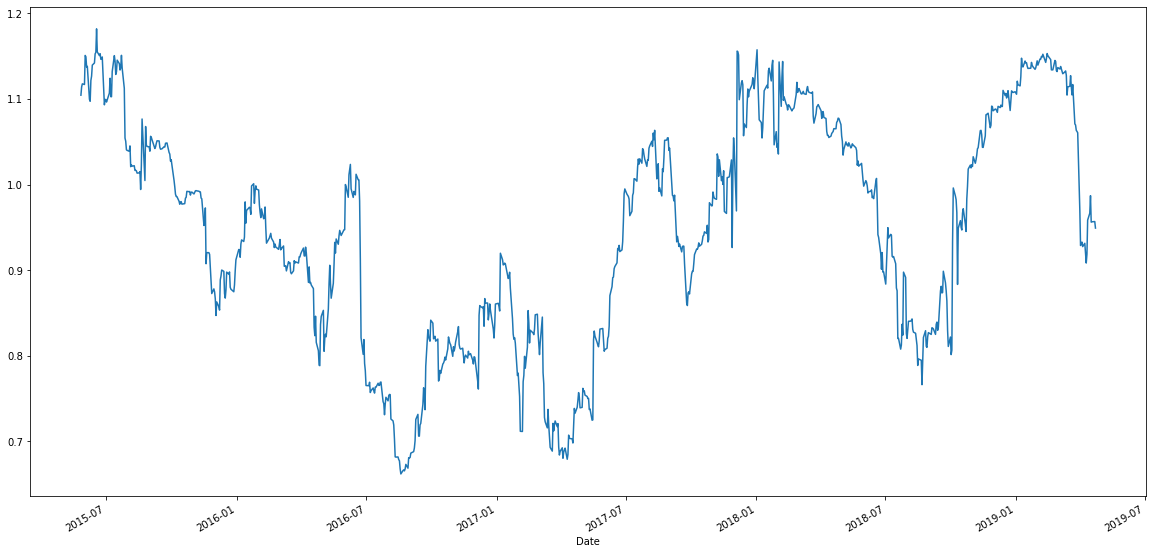

In [62]:
ziggy_rolling_cov=combined_df['Ziggy'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_var_v2=combined_df['S&P 500'].rolling(window=60).var()
rolling_beta_ziggy=ziggy_rolling_cov/rolling_var_v2
rolling_beta_ziggy.plot(figsize=(20,10))

In [63]:
## Sharpe Ratio Calculations including my portfolio
sharpe_ratio_2=combined_df.mean() *252 /(combined_df.std() * np.sqrt(252))
sharpe_ratio_2.sort_values(ascending=False,inplace=True)
sharpe_ratio_2

Algo 1                         1.378648
Ziggy                          0.954629
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

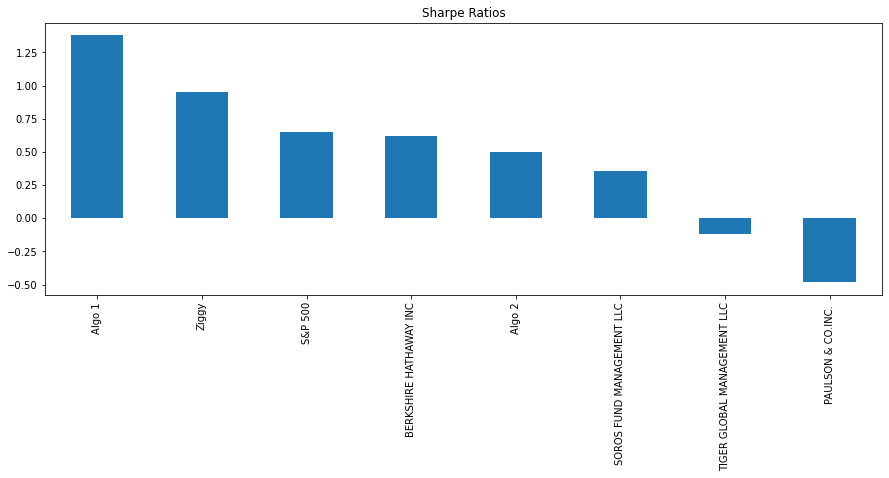

In [64]:
sharpe_ratio_2.plot.bar(title="Sharpe Ratios",figsize=(15,5))

In [65]:
# My portfolio out performs the S&P 500 with a higher Sharpe ratio. It is postively correlated to the S&P 500 and it has a higher standard deviation and the second highest average daily 
# returns. It trails just behind the ALGO 1 portfolio that Harold created. 